## Введение в искусственные нейронные сети
### Урок 3. TensorFlow

1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.


2. Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

### Загрузка, предварительный анализ и подготовка данных. 

In [2]:
# Загрузка датасета
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Визуальный анализ набора 
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Быстрый анализ типов данных и наличия пропусков 
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# Описательные статистики набора 
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
# Разбиение на целевую переменную и признаки  
X = boston.drop(['target'], axis=1)
y = boston['target']

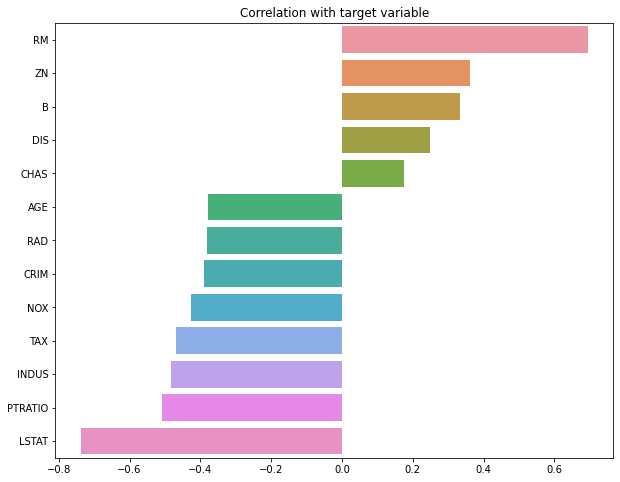

In [7]:
# Оценка корелляции признаков и целевой переменной 
corr_with_target = boston.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [8]:
# Масштабирование признаков 
X_scaled = StandardScaler().fit(X).transform(X)

In [9]:
# Разбиение выборки 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## Построение нейронной сети 

**Тип сети:** полносвязная сеть

**Контролируемые парметры:** 

- Число слоев
- Число нейронов
- Типы активации
- Тип оптимизатора

### Однослойная нейронная сеть

**Параметры сети:** 
- Число слоев =1 
- Число нейронов = 64 
- Типы активации = relu
- Тип оптимизатора = SGD

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


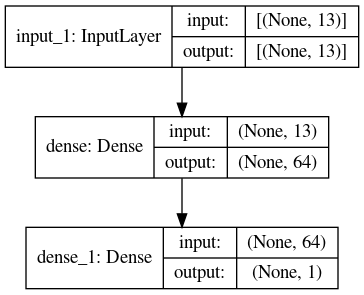

In [10]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input)
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 12303709060988928.0000 - MAE: 40104108.0000 - val_loss: 32888521228288.0000 - val_MAE: 5734851.0000
Epoch 2/100
10/10 - 0s - loss: 27803458207744.0000 - MAE: 5264633.0000 - val_loss: 21956636180480.0000 - val_MAE: 4685790.5000
Epoch 3/100
10/10 - 0s - loss: 18561812660224.0000 - MAE: 4301589.0000 - val_loss: 14658422439936.0000 - val_MAE: 3828631.7500
Epoch 4/100
10/10 - 0s - loss: 12392013496320.0000 - MAE: 3514711.2500 - val_loss: 9786075643904.0000 - val_MAE: 3128270.5000
Epoch 5/100
10/10 - 0s - loss: 8273006166016.0000 - MAE: 2871775.0000 - val_loss: 6533256577024.0000 - val_MAE: 2556023.5000
Epoch 6/100
10/10 - 0s - loss: 5523122946048.0000 - MAE: 2346448.7500 - val_loss: 4361650176000.0000 - val_MAE: 2088456.5000
Epoch 7/100
10/10 - 0s - loss: 3687280541696.0000 - MAE: 1917219.3750 - val_loss: 2911870910464.0000 - val_MAE: 1706420.6250
Epoch 8/100
10/10 - 0s - loss: 2461658513408.0000 - MAE: 1566507.8750 - val_loss: 1943986634752.0000 - val_MAE: 13

Epoch 76/100
10/10 - 0s - loss: 90.1686 - MAE: 6.7067 - val_loss: 25.0279 - val_MAE: 3.3409
Epoch 77/100
10/10 - 0s - loss: 89.2388 - MAE: 6.7076 - val_loss: 26.0437 - val_MAE: 3.3975
Epoch 78/100
10/10 - 0s - loss: 88.6537 - MAE: 6.7166 - val_loss: 26.9753 - val_MAE: 3.4462
Epoch 79/100
10/10 - 0s - loss: 88.2557 - MAE: 6.7306 - val_loss: 27.7685 - val_MAE: 3.4867
Epoch 80/100
10/10 - 0s - loss: 87.9560 - MAE: 6.7250 - val_loss: 28.7124 - val_MAE: 3.5573
Epoch 81/100
10/10 - 0s - loss: 87.7072 - MAE: 6.7366 - val_loss: 29.4523 - val_MAE: 3.6197
Epoch 82/100
10/10 - 0s - loss: 87.5427 - MAE: 6.7513 - val_loss: 30.0675 - val_MAE: 3.6694
Epoch 83/100
10/10 - 0s - loss: 87.4496 - MAE: 6.7667 - val_loss: 30.6376 - val_MAE: 3.7140
Epoch 84/100
10/10 - 0s - loss: 87.4149 - MAE: 6.7806 - val_loss: 31.2157 - val_MAE: 3.7602
Epoch 85/100
10/10 - 0s - loss: 87.3333 - MAE: 6.7869 - val_loss: 31.4209 - val_MAE: 3.7780
Epoch 86/100
10/10 - 0s - loss: 87.3321 - MAE: 6.7926 - val_loss: 31.6742 - val_

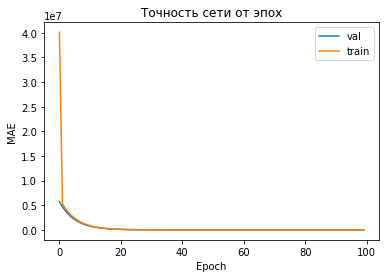

In [11]:
model.compile(optimizer='SGD',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперементы с параметрами 

**Параметры сети для эксперментов:** 
- Число слоев =3, 5, 10, 15  
- Число нейронов = 64 128, 256, 512, 1024
- Типы активации = relu, elu, sigmoid, tanh
- Тип оптимизатора = SGD, RMSprop, Adam

### Эксперемент 1:

- Число слоев =3,  
- Число нейронов = 64 
- Типы активации = elu
- Тип оптимизатора = RMSprop

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


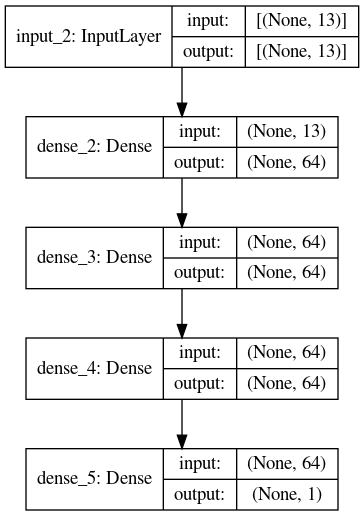

In [12]:
input = Input(shape=(13,))
x = Dense(64, activation='elu')(input)
x = Dense(64, activation='elu')(x)
x = Dense(64, activation='elu')(x)
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 316.2492 - MAE: 11.9287 - val_loss: 53.0377 - val_MAE: 6.0904
Epoch 2/100
10/10 - 0s - loss: 149.2655 - MAE: 9.7341 - val_loss: 51.2297 - val_MAE: 5.9859
Epoch 3/100
10/10 - 0s - loss: 118.2815 - MAE: 8.5417 - val_loss: 58.0300 - val_MAE: 6.2473
Epoch 4/100
10/10 - 0s - loss: 117.8916 - MAE: 8.4515 - val_loss: 133.0982 - val_MAE: 10.4122
Epoch 5/100
10/10 - 0s - loss: 102.5904 - MAE: 7.8667 - val_loss: 33.7982 - val_MAE: 4.9126
Epoch 6/100
10/10 - 0s - loss: 117.7926 - MAE: 8.3946 - val_loss: 22.0918 - val_MAE: 3.7178
Epoch 7/100
10/10 - 0s - loss: 92.5665 - MAE: 7.4174 - val_loss: 314.3797 - val_MAE: 17.2530
Epoch 8/100
10/10 - 0s - loss: 131.6187 - MAE: 9.2730 - val_loss: 40.4631 - val_MAE: 5.1790
Epoch 9/100
10/10 - 0s - loss: 85.0680 - MAE: 7.0578 - val_loss: 24.3288 - val_MAE: 4.2788
Epoch 10/100
10/10 - 0s - loss: 73.7417 - MAE: 6.2801 - val_loss: 260.2713 - val_MAE: 15.5575
Epoch 11/100
10/10 - 0s - loss: 103.7404 - MAE: 7.9002 - val_loss: 18.0587 

Epoch 90/100
10/10 - 0s - loss: 40.4504 - MAE: 4.4053 - val_loss: 16.2111 - val_MAE: 3.0019
Epoch 91/100
10/10 - 0s - loss: 27.8637 - MAE: 3.8050 - val_loss: 17.2249 - val_MAE: 3.3466
Epoch 92/100
10/10 - 0s - loss: 31.7278 - MAE: 4.0879 - val_loss: 144.8837 - val_MAE: 10.5006
Epoch 93/100
10/10 - 0s - loss: 31.7519 - MAE: 4.1075 - val_loss: 21.7226 - val_MAE: 3.8699
Epoch 94/100
10/10 - 0s - loss: 30.8265 - MAE: 3.8948 - val_loss: 31.8992 - val_MAE: 4.3933
Epoch 95/100
10/10 - 0s - loss: 32.1489 - MAE: 4.2286 - val_loss: 29.6592 - val_MAE: 4.7189
Epoch 96/100
10/10 - 0s - loss: 27.8214 - MAE: 3.5873 - val_loss: 138.9774 - val_MAE: 10.5435
Epoch 97/100
10/10 - 0s - loss: 35.4258 - MAE: 4.3765 - val_loss: 18.4237 - val_MAE: 3.2079
Epoch 98/100
10/10 - 0s - loss: 29.9345 - MAE: 3.9701 - val_loss: 19.4919 - val_MAE: 3.2754
Epoch 99/100
10/10 - 0s - loss: 31.4440 - MAE: 3.8311 - val_loss: 23.3435 - val_MAE: 3.6206
Epoch 100/100
10/10 - 0s - loss: 29.8584 - MAE: 3.8463 - val_loss: 113.1866 

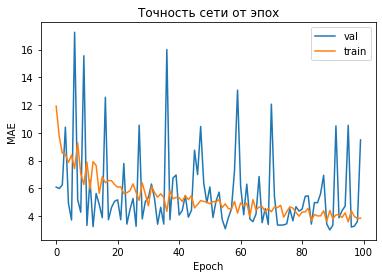

In [13]:
model.compile(optimizer='RMSprop',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 2:

- Число слоев = 5,  
- Число нейронов = 64, 128, 256, 128, 64 
- Типы активации = tanh
- Тип оптимизатора = Adam

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65  

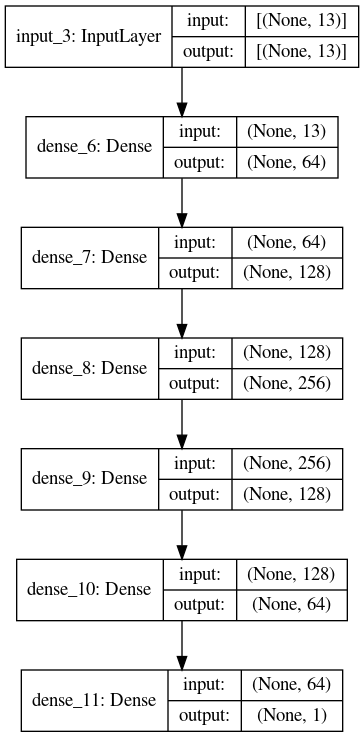

In [14]:
input = Input(shape=(13,))
x = Dense(64, activation='tanh')(input)
x = Dense(128, activation='tanh')(x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 364.4630 - MAE: 16.5300 - val_loss: 116.6813 - val_MAE: 10.0585
Epoch 2/100
10/10 - 0s - loss: 242.9211 - MAE: 12.7080 - val_loss: 94.1711 - val_MAE: 9.0203
Epoch 3/100
10/10 - 0s - loss: 220.3505 - MAE: 11.8859 - val_loss: 81.8857 - val_MAE: 8.3821
Epoch 4/100
10/10 - 0s - loss: 204.4182 - MAE: 11.2731 - val_loss: 71.7742 - val_MAE: 7.8329
Epoch 5/100
10/10 - 0s - loss: 190.5115 - MAE: 10.7225 - val_loss: 63.0178 - val_MAE: 7.3346
Epoch 6/100
10/10 - 0s - loss: 178.1419 - MAE: 10.2196 - val_loss: 55.4340 - val_MAE: 6.8584
Epoch 7/100
10/10 - 0s - loss: 166.9823 - MAE: 9.7740 - val_loss: 48.9426 - val_MAE: 6.4452
Epoch 8/100
10/10 - 0s - loss: 156.9667 - MAE: 9.3666 - val_loss: 43.4104 - val_MAE: 6.0582
Epoch 9/100
10/10 - 0s - loss: 148.1176 - MAE: 9.0130 - val_loss: 38.6358 - val_MAE: 5.6830
Epoch 10/100
10/10 - 0s - loss: 140.2696 - MAE: 8.6984 - val_loss: 34.6019 - val_MAE: 5.3618
Epoch 11/100
10/10 - 0s - loss: 133.0463 - MAE: 8.4067 - val_loss: 31.3

Epoch 90/100
10/10 - 0s - loss: 61.1308 - MAE: 5.5256 - val_loss: 33.3735 - val_MAE: 4.8881
Epoch 91/100
10/10 - 0s - loss: 59.5508 - MAE: 5.3856 - val_loss: 32.3886 - val_MAE: 4.8184
Epoch 92/100
10/10 - 0s - loss: 59.8474 - MAE: 5.4332 - val_loss: 31.0823 - val_MAE: 4.6738
Epoch 93/100
10/10 - 0s - loss: 59.3966 - MAE: 5.4252 - val_loss: 31.7479 - val_MAE: 4.7020
Epoch 94/100
10/10 - 0s - loss: 60.5615 - MAE: 5.5872 - val_loss: 29.4945 - val_MAE: 4.3675
Epoch 95/100
10/10 - 0s - loss: 59.0655 - MAE: 5.3774 - val_loss: 28.6354 - val_MAE: 4.2053
Epoch 96/100
10/10 - 0s - loss: 58.2191 - MAE: 5.3080 - val_loss: 28.9068 - val_MAE: 4.2269
Epoch 97/100
10/10 - 0s - loss: 58.9368 - MAE: 5.4276 - val_loss: 32.3254 - val_MAE: 4.5781
Epoch 98/100
10/10 - 0s - loss: 59.9709 - MAE: 5.6764 - val_loss: 32.8820 - val_MAE: 4.6481
Epoch 99/100
10/10 - 0s - loss: 58.9341 - MAE: 5.5731 - val_loss: 30.9059 - val_MAE: 4.4558
Epoch 100/100
10/10 - 0s - loss: 60.2839 - MAE: 5.4239 - val_loss: 32.5362 - val

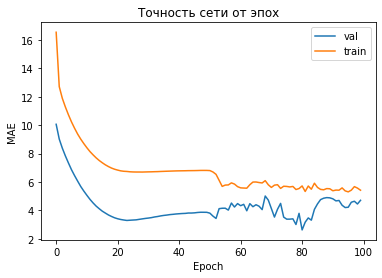

In [15]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 3:

- Число слоев = 5,  
- Число нейронов = 64, 128, 256, 128, 64 
- Типы активации = relu
- Тип оптимизатора = SGD

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65  

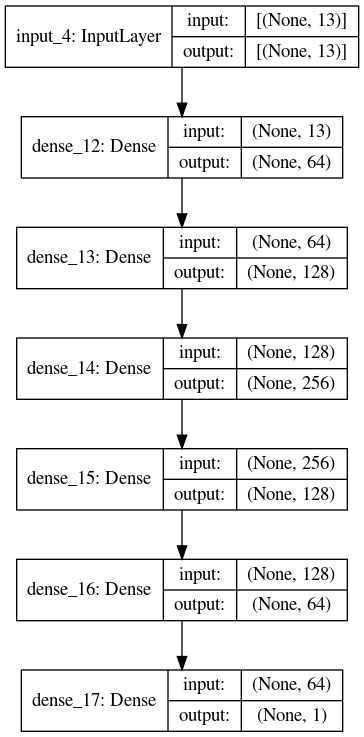

In [16]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 2/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 3/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 4/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 5/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 6/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 7/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 8/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 9/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 10/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 11/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 12/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE: nan
Epoch 13/100
10/10 - 0s - loss: nan - MAE: nan - val_loss: nan - val_MAE:

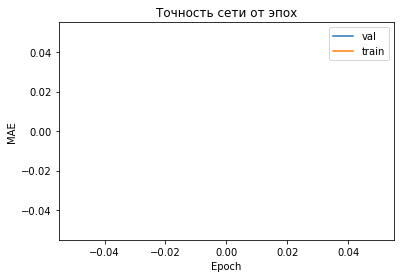

In [17]:
model.compile(optimizer='SGD',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 4:

- Число слоев = 10,  
- Число нейронов = 64, 128, 256, 512, 1024
- Типы активации = relu
- Тип оптимизатора = Adam

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               5248

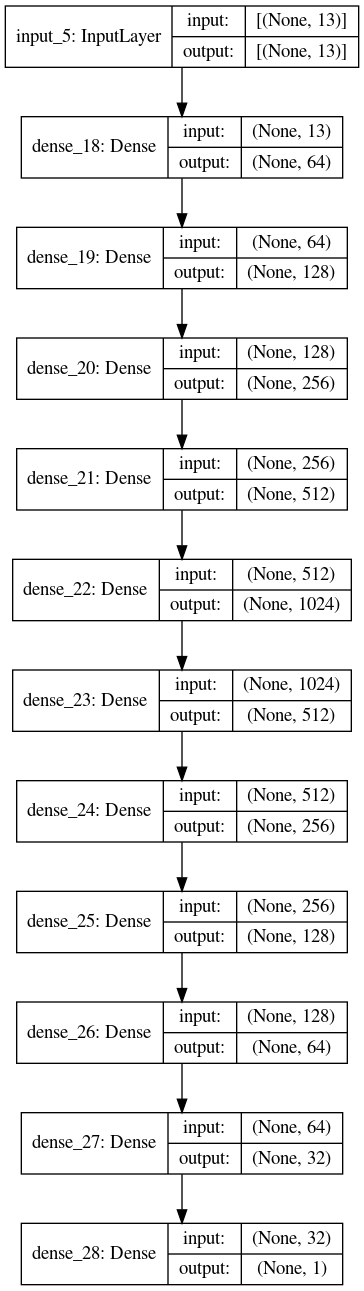

In [18]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input) #1
x = Dense(128, activation='relu')(x) #2
x = Dense(256, activation='relu')(x) #3
x = Dense(512, activation='relu')(x) #4
x = Dense(1024, activation='relu')(x) #5
x = Dense(512, activation='relu')(x) #6
x = Dense(256, activation='relu')(x) #7
x = Dense(128, activation='relu')(x) #8
x = Dense(64, activation='relu')(x) #9
x = Dense(32, activation='relu')(x) #10
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 308.8436 - MAE: 13.2979 - val_loss: 77.1680 - val_MAE: 6.9478
Epoch 2/100
10/10 - 0s - loss: 84.0842 - MAE: 6.6642 - val_loss: 51.7457 - val_MAE: 5.6375
Epoch 3/100
10/10 - 0s - loss: 77.1184 - MAE: 6.2994 - val_loss: 30.9986 - val_MAE: 4.2992
Epoch 4/100
10/10 - 0s - loss: 70.3927 - MAE: 6.2722 - val_loss: 26.2172 - val_MAE: 4.0829
Epoch 5/100
10/10 - 0s - loss: 64.5499 - MAE: 5.7248 - val_loss: 26.4104 - val_MAE: 4.1400
Epoch 6/100
10/10 - 0s - loss: 63.0616 - MAE: 5.7188 - val_loss: 23.8201 - val_MAE: 3.9535
Epoch 7/100
10/10 - 0s - loss: 63.0820 - MAE: 5.6249 - val_loss: 29.0752 - val_MAE: 4.1525
Epoch 8/100
10/10 - 0s - loss: 61.8414 - MAE: 5.5992 - val_loss: 27.4500 - val_MAE: 4.3551
Epoch 9/100
10/10 - 0s - loss: 60.4373 - MAE: 5.5316 - val_loss: 24.0910 - val_MAE: 3.7440
Epoch 10/100
10/10 - 0s - loss: 62.3158 - MAE: 5.6073 - val_loss: 26.7886 - val_MAE: 4.2716
Epoch 11/100
10/10 - 0s - loss: 60.7955 - MAE: 5.5253 - val_loss: 37.9483 - val_MAE: 4.

10/10 - 0s - loss: 14.8840 - MAE: 2.8063 - val_loss: 9.9552 - val_MAE: 2.3263
Epoch 91/100
10/10 - 0s - loss: 14.2529 - MAE: 2.7348 - val_loss: 9.6827 - val_MAE: 2.2663
Epoch 92/100
10/10 - 0s - loss: 13.7641 - MAE: 2.6688 - val_loss: 14.5476 - val_MAE: 3.0482
Epoch 93/100
10/10 - 0s - loss: 13.7262 - MAE: 2.6251 - val_loss: 14.0959 - val_MAE: 2.7550
Epoch 94/100
10/10 - 0s - loss: 15.5220 - MAE: 2.8046 - val_loss: 28.7641 - val_MAE: 4.5198
Epoch 95/100
10/10 - 0s - loss: 14.4688 - MAE: 2.7100 - val_loss: 19.9664 - val_MAE: 3.7506
Epoch 96/100
10/10 - 0s - loss: 15.1600 - MAE: 2.8394 - val_loss: 10.4439 - val_MAE: 2.3338
Epoch 97/100
10/10 - 0s - loss: 13.3040 - MAE: 2.6647 - val_loss: 14.1727 - val_MAE: 3.0304
Epoch 98/100
10/10 - 0s - loss: 13.1598 - MAE: 2.6943 - val_loss: 14.6461 - val_MAE: 3.0508
Epoch 99/100
10/10 - 0s - loss: 16.0685 - MAE: 2.9787 - val_loss: 15.5769 - val_MAE: 3.0686
Epoch 100/100
10/10 - 0s - loss: 17.3558 - MAE: 3.0319 - val_loss: 13.8394 - val_MAE: 2.9817


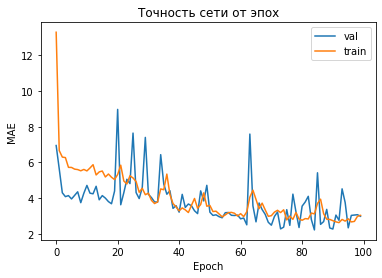

In [19]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 5:

- Число слоев = 10,  
- Число нейронов = 64, 128, 256, 512, 1024
- Типы активации = sigmoid
- Тип оптимизатора = SGD

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              14336     
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080

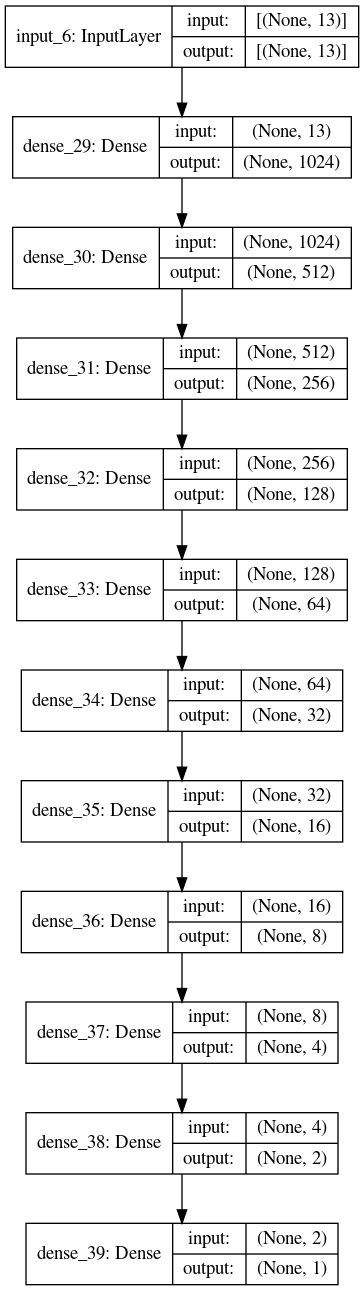

In [20]:
input = Input(shape=(13,))
x = Dense(1024, activation='sigmoid')(input) #1
x = Dense(512, activation='sigmoid')(x) #2
x = Dense(256, activation='sigmoid')(x) #3
x = Dense(128, activation='sigmoid')(x) #4
x = Dense(64, activation='sigmoid')(x) #5
x = Dense(32, activation='sigmoid')(x) #6
x = Dense(16, activation='sigmoid')(x) #7
x = Dense(8, activation='sigmoid')(x) #8
x = Dense(4, activation='sigmoid')(x) #9
x = Dense(2, activation='sigmoid')(x) #10
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 515.8082 - MAE: 20.6491 - val_loss: 221.3683 - val_MAE: 14.1335
Epoch 2/100
10/10 - 0s - loss: 305.4303 - MAE: 14.7444 - val_loss: 76.7461 - val_MAE: 8.0965
Epoch 3/100
10/10 - 0s - loss: 160.5768 - MAE: 9.5275 - val_loss: 28.1088 - val_MAE: 4.7124
Epoch 4/100
10/10 - 0s - loss: 109.2587 - MAE: 7.3610 - val_loss: 21.6219 - val_MAE: 3.5501
Epoch 5/100
10/10 - 0s - loss: 93.7623 - MAE: 6.7814 - val_loss: 24.7803 - val_MAE: 3.3357
Epoch 6/100
10/10 - 0s - loss: 88.7931 - MAE: 6.7071 - val_loss: 28.2461 - val_MAE: 3.5231
Epoch 7/100
10/10 - 0s - loss: 87.6654 - MAE: 6.7523 - val_loss: 29.9486 - val_MAE: 3.6600
Epoch 8/100
10/10 - 0s - loss: 87.4296 - MAE: 6.7641 - val_loss: 31.7064 - val_MAE: 3.8023
Epoch 9/100
10/10 - 0s - loss: 87.4719 - MAE: 6.8240 - val_loss: 32.2895 - val_MAE: 3.8511
Epoch 10/100
10/10 - 0s - loss: 87.4548 - MAE: 6.8118 - val_loss: 32.9982 - val_MAE: 3.9085
Epoch 11/100
10/10 - 0s - loss: 87.3520 - MAE: 6.8441 - val_loss: 32.5996 - val_M

Epoch 91/100
10/10 - 0s - loss: 87.4253 - MAE: 6.8321 - val_loss: 32.6610 - val_MAE: 3.8814
Epoch 92/100
10/10 - 0s - loss: 87.2800 - MAE: 6.8188 - val_loss: 33.0009 - val_MAE: 3.9087
Epoch 93/100
10/10 - 0s - loss: 87.3070 - MAE: 6.8266 - val_loss: 33.4244 - val_MAE: 3.9422
Epoch 94/100
10/10 - 0s - loss: 87.3139 - MAE: 6.8457 - val_loss: 32.9669 - val_MAE: 3.9060
Epoch 95/100
10/10 - 0s - loss: 87.2999 - MAE: 6.8344 - val_loss: 33.0794 - val_MAE: 3.9150
Epoch 96/100
10/10 - 0s - loss: 87.3417 - MAE: 6.8187 - val_loss: 33.4328 - val_MAE: 3.9429
Epoch 97/100
10/10 - 0s - loss: 87.3077 - MAE: 6.8304 - val_loss: 33.6345 - val_MAE: 3.9586
Epoch 98/100
10/10 - 0s - loss: 87.3117 - MAE: 6.8399 - val_loss: 33.4579 - val_MAE: 3.9448
Epoch 99/100
10/10 - 0s - loss: 87.3631 - MAE: 6.8448 - val_loss: 33.3531 - val_MAE: 3.9366
Epoch 100/100
10/10 - 0s - loss: 87.3548 - MAE: 6.8223 - val_loss: 33.9743 - val_MAE: 3.9848


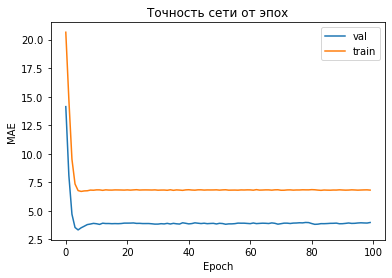

In [21]:
model.compile(optimizer='SGD',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 6:

- Число слоев = 10,  
- Число нейронов = 64, 128, 256, 512, 1024
- Типы активации = relu
- Тип оптимизатора = RMSprop

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_43 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_44 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               5248

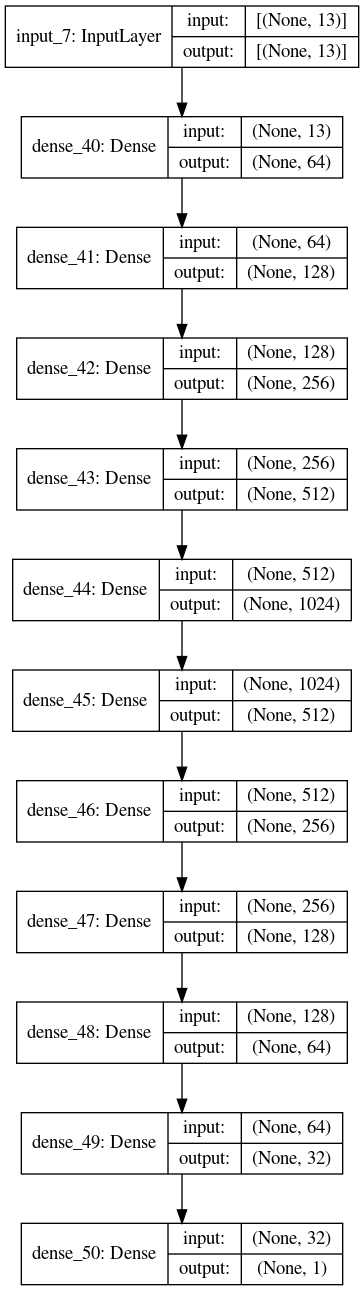

In [22]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input) #1
x = Dense(128, activation='relu')(x) #2
x = Dense(256, activation='relu')(x) #3
x = Dense(512, activation='relu')(x) #4
x = Dense(1024, activation='relu')(x) #5
x = Dense(512, activation='relu')(x) #6
x = Dense(256, activation='relu')(x) #7
x = Dense(128, activation='relu')(x) #8
x = Dense(64, activation='relu')(x) #9
x = Dense(32, activation='relu')(x) #10
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 538.8997 - MAE: 19.9257 - val_loss: 176.5518 - val_MAE: 12.5461
Epoch 2/100
10/10 - 0s - loss: 109.3726 - MAE: 8.0169 - val_loss: 34.2929 - val_MAE: 5.0978
Epoch 3/100
10/10 - 0s - loss: 97.8006 - MAE: 7.5665 - val_loss: 26.4594 - val_MAE: 4.2594
Epoch 4/100
10/10 - 0s - loss: 98.2201 - MAE: 7.4647 - val_loss: 24.1696 - val_MAE: 4.0464
Epoch 5/100
10/10 - 0s - loss: 123.1121 - MAE: 8.5676 - val_loss: 49.0853 - val_MAE: 5.3385
Epoch 6/100
10/10 - 0s - loss: 119.7919 - MAE: 8.3134 - val_loss: 143.7230 - val_MAE: 10.3946
Epoch 7/100
10/10 - 0s - loss: 111.9719 - MAE: 7.9495 - val_loss: 51.4211 - val_MAE: 5.8256
Epoch 8/100
10/10 - 0s - loss: 104.0078 - MAE: 7.6197 - val_loss: 45.8688 - val_MAE: 5.7884
Epoch 9/100
10/10 - 0s - loss: 104.6208 - MAE: 7.6740 - val_loss: 83.1702 - val_MAE: 7.5561
Epoch 10/100
10/10 - 0s - loss: 91.0398 - MAE: 7.1525 - val_loss: 80.1765 - val_MAE: 8.2451
Epoch 11/100
10/10 - 0s - loss: 84.3650 - MAE: 6.8249 - val_loss: 65.6120 - v

Epoch 90/100
10/10 - 0s - loss: 52.0772 - MAE: 5.2598 - val_loss: 20.9073 - val_MAE: 2.9448
Epoch 91/100
10/10 - 0s - loss: 55.2219 - MAE: 5.3099 - val_loss: 48.6779 - val_MAE: 5.6392
Epoch 92/100
10/10 - 0s - loss: 57.4146 - MAE: 5.5626 - val_loss: 32.6171 - val_MAE: 4.0709
Epoch 93/100
10/10 - 0s - loss: 34.6185 - MAE: 4.2542 - val_loss: 167.2107 - val_MAE: 11.3862
Epoch 94/100
10/10 - 0s - loss: 62.4392 - MAE: 6.0118 - val_loss: 23.5886 - val_MAE: 4.1213
Epoch 95/100
10/10 - 0s - loss: 59.6722 - MAE: 5.5446 - val_loss: 23.9613 - val_MAE: 3.8167
Epoch 96/100
10/10 - 0s - loss: 41.3338 - MAE: 4.5617 - val_loss: 31.2699 - val_MAE: 3.8427
Epoch 97/100
10/10 - 0s - loss: 62.6506 - MAE: 5.4048 - val_loss: 116.4586 - val_MAE: 10.1698
Epoch 98/100
10/10 - 0s - loss: 48.8565 - MAE: 5.0088 - val_loss: 233.5377 - val_MAE: 13.7317
Epoch 99/100
10/10 - 0s - loss: 62.5879 - MAE: 5.8349 - val_loss: 21.9772 - val_MAE: 3.1728
Epoch 100/100
10/10 - 0s - loss: 52.4666 - MAE: 5.4370 - val_loss: 28.6079

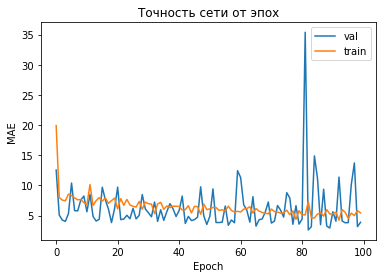

In [23]:
model.compile(optimizer='RMSprop',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 7:

- Число слоев = 15,  
- Число нейронов = 64, 128, 256, 512, 1024
- Типы активации = relu
- Тип оптимизатора = Adam

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_54 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_55 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              5253

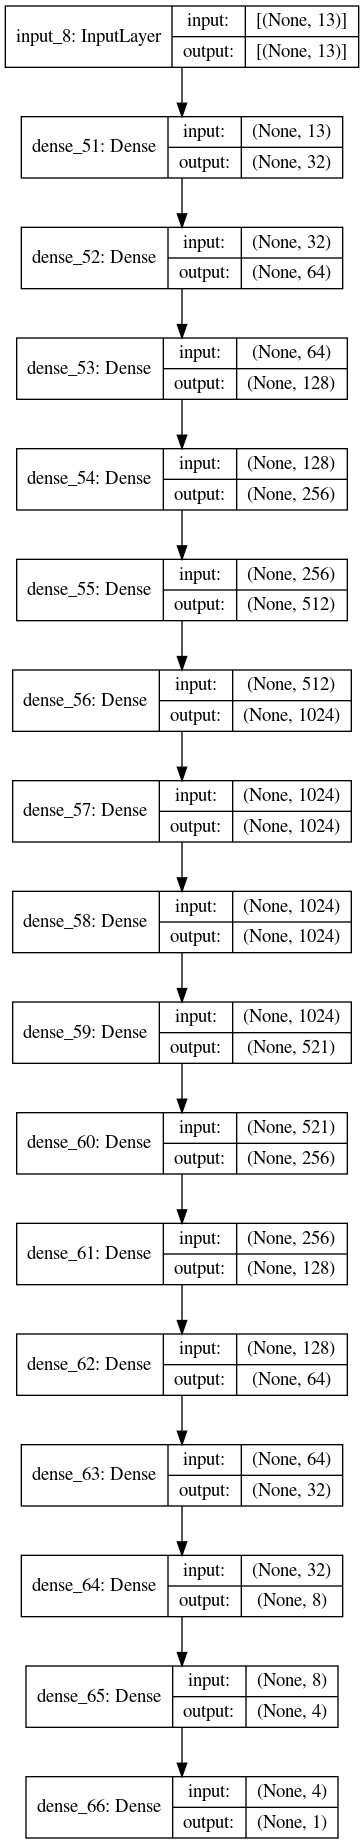

In [24]:
input = Input(shape=(13,))
x = Dense(32, activation='relu')(input) #1
x = Dense(64, activation='relu')(x) #2
x = Dense(128, activation='relu')(x) #3
x = Dense(256, activation='relu')(x) #4
x = Dense(512, activation='relu')(x) #5
x = Dense(1024, activation='relu')(x) #6
x = Dense(1024, activation='relu')(x) #7
x = Dense(1024, activation='relu')(x) #8
x = Dense(521, activation='relu')(x) #9
x = Dense(256, activation='relu')(x) #10
x = Dense(128, activation='relu')(x) #11
x = Dense(64, activation='relu')(x) #12
x = Dense(32, activation='relu')(x) #13
x = Dense(8, activation='relu')(x) #14
x = Dense(4, activation='relu')(x) #15
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 578.6182 - MAE: 19.2968 - val_loss: 62.1569 - val_MAE: 6.0744
Epoch 2/100
10/10 - 0s - loss: 114.2986 - MAE: 8.0706 - val_loss: 103.7384 - val_MAE: 8.7601
Epoch 3/100
10/10 - 0s - loss: 82.7307 - MAE: 6.7326 - val_loss: 22.0132 - val_MAE: 3.8424
Epoch 4/100
10/10 - 0s - loss: 71.8393 - MAE: 6.0907 - val_loss: 32.0783 - val_MAE: 4.5991
Epoch 5/100
10/10 - 0s - loss: 60.4302 - MAE: 5.4995 - val_loss: 26.4790 - val_MAE: 3.9195
Epoch 6/100
10/10 - 0s - loss: 57.5789 - MAE: 5.2812 - val_loss: 17.2394 - val_MAE: 3.2106
Epoch 7/100
10/10 - 0s - loss: 60.6817 - MAE: 5.5263 - val_loss: 21.8641 - val_MAE: 3.7895
Epoch 8/100
10/10 - 0s - loss: 59.1213 - MAE: 5.2515 - val_loss: 53.7131 - val_MAE: 5.8746
Epoch 9/100
10/10 - 0s - loss: 59.4018 - MAE: 5.4359 - val_loss: 19.1612 - val_MAE: 3.5011
Epoch 10/100
10/10 - 0s - loss: 55.2505 - MAE: 5.2211 - val_loss: 24.5551 - val_MAE: 3.7291
Epoch 11/100
10/10 - 0s - loss: 51.7132 - MAE: 4.9725 - val_loss: 25.9299 - val_MAE: 

10/10 - 0s - loss: 24.4192 - MAE: 3.5827 - val_loss: 19.6289 - val_MAE: 3.3636
Epoch 91/100
10/10 - 0s - loss: 19.6812 - MAE: 3.2376 - val_loss: 11.5479 - val_MAE: 2.7326
Epoch 92/100
10/10 - 0s - loss: 32.6219 - MAE: 4.0926 - val_loss: 92.1620 - val_MAE: 8.3829
Epoch 93/100
10/10 - 0s - loss: 24.3448 - MAE: 3.7384 - val_loss: 18.7491 - val_MAE: 3.5979
Epoch 94/100
10/10 - 0s - loss: 18.3997 - MAE: 3.1116 - val_loss: 12.9788 - val_MAE: 2.6268
Epoch 95/100
10/10 - 0s - loss: 12.9651 - MAE: 2.6332 - val_loss: 9.8508 - val_MAE: 2.3363
Epoch 96/100
10/10 - 0s - loss: 13.8334 - MAE: 2.7044 - val_loss: 15.8028 - val_MAE: 2.9906
Epoch 97/100
10/10 - 0s - loss: 15.7076 - MAE: 2.7925 - val_loss: 17.9592 - val_MAE: 3.2327
Epoch 98/100
10/10 - 0s - loss: 12.2631 - MAE: 2.4822 - val_loss: 10.8941 - val_MAE: 2.4379
Epoch 99/100
10/10 - 0s - loss: 15.8442 - MAE: 2.7645 - val_loss: 17.4601 - val_MAE: 3.2555
Epoch 100/100
10/10 - 0s - loss: 12.9590 - MAE: 2.5547 - val_loss: 12.5307 - val_MAE: 2.5092


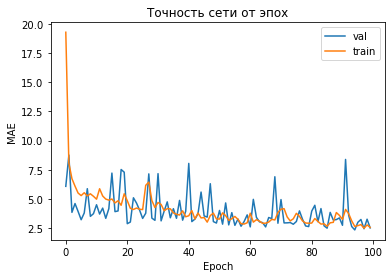

In [25]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 8:

- Число слоев = 15,  
- Число нейронов = 64
- Типы активации = sigmoid
- Тип оптимизатора = Adam

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_70 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_71 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_72 (Dense)             (None, 64)                4160

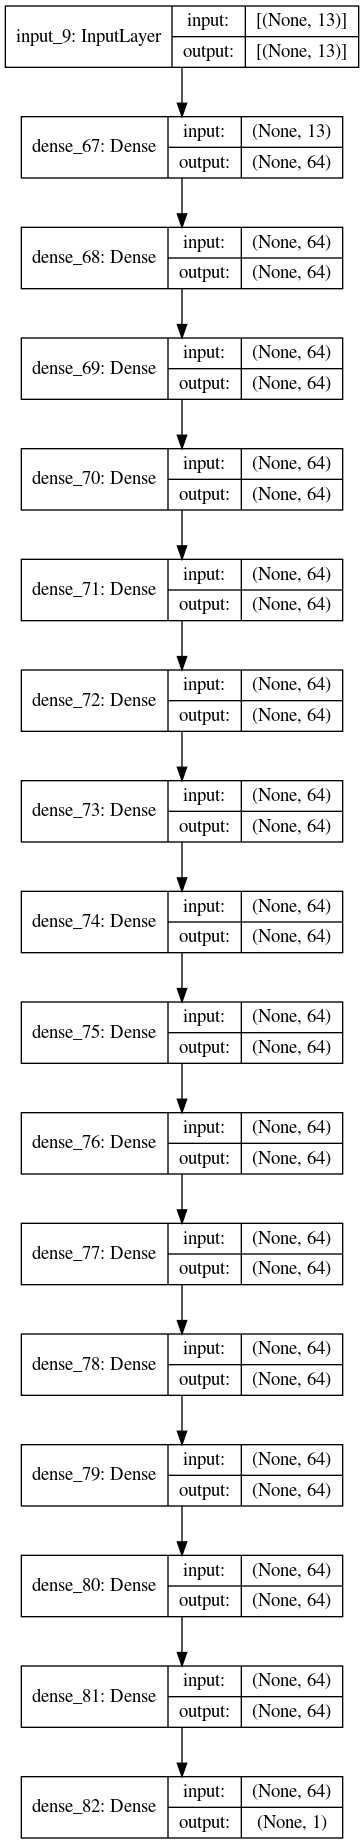

In [26]:
input = Input(shape=(13,))
x = Dense(64, activation='sigmoid')(input) #1
x = Dense(64, activation='sigmoid')(x) #2
x = Dense(64, activation='sigmoid')(x) #3
x = Dense(64, activation='sigmoid')(x) #4
x = Dense(64, activation='sigmoid')(x) #5
x = Dense(64, activation='sigmoid')(x) #6
x = Dense(64, activation='sigmoid')(x) #7
x = Dense(64, activation='sigmoid')(x) #8
x = Dense(64, activation='sigmoid')(x) #9
x = Dense(64, activation='sigmoid')(x) #10
x = Dense(64, activation='sigmoid')(x) #11
x = Dense(64, activation='sigmoid')(x) #12
x = Dense(64, activation='sigmoid')(x) #13
x = Dense(64, activation='sigmoid')(x) #14
x = Dense(64, activation='sigmoid')(x) #15
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 547.6319 - MAE: 21.4532 - val_loss: 322.4346 - val_MAE: 17.3442
Epoch 2/100
10/10 - 0s - loss: 494.4294 - MAE: 20.1692 - val_loss: 280.3738 - val_MAE: 16.0860
Epoch 3/100
10/10 - 0s - loss: 445.9922 - MAE: 18.9371 - val_loss: 243.4403 - val_MAE: 14.8938
Epoch 4/100
10/10 - 0s - loss: 404.0080 - MAE: 17.7934 - val_loss: 212.8927 - val_MAE: 13.8304
Epoch 5/100
10/10 - 0s - loss: 369.5831 - MAE: 16.8197 - val_loss: 189.5544 - val_MAE: 12.9592
Epoch 6/100
10/10 - 0s - loss: 343.7550 - MAE: 16.0352 - val_loss: 171.7422 - val_MAE: 12.2590
Epoch 7/100
10/10 - 0s - loss: 323.3978 - MAE: 15.4009 - val_loss: 157.7302 - val_MAE: 11.7183
Epoch 8/100
10/10 - 0s - loss: 306.4432 - MAE: 14.8690 - val_loss: 145.9560 - val_MAE: 11.2484
Epoch 9/100
10/10 - 0s - loss: 292.0005 - MAE: 14.3866 - val_loss: 135.3168 - val_MAE: 10.8357
Epoch 10/100
10/10 - 0s - loss: 278.6089 - MAE: 13.9415 - val_loss: 125.6188 - val_MAE: 10.4423
Epoch 11/100
10/10 - 0s - loss: 266.0543 - MAE: 1

Epoch 90/100
10/10 - 0s - loss: 87.2547 - MAE: 6.8085 - val_loss: 32.1815 - val_MAE: 3.8421
Epoch 91/100
10/10 - 0s - loss: 87.2554 - MAE: 6.8093 - val_loss: 32.2060 - val_MAE: 3.8442
Epoch 92/100
10/10 - 0s - loss: 87.2522 - MAE: 6.8096 - val_loss: 32.2371 - val_MAE: 3.8467
Epoch 93/100
10/10 - 0s - loss: 87.2530 - MAE: 6.8097 - val_loss: 32.2477 - val_MAE: 3.8476
Epoch 94/100
10/10 - 0s - loss: 87.2513 - MAE: 6.8108 - val_loss: 32.3068 - val_MAE: 3.8525
Epoch 95/100
10/10 - 0s - loss: 87.2518 - MAE: 6.8131 - val_loss: 32.3937 - val_MAE: 3.8596
Epoch 96/100
10/10 - 0s - loss: 87.2487 - MAE: 6.8144 - val_loss: 32.4281 - val_MAE: 3.8624
Epoch 97/100
10/10 - 0s - loss: 87.2501 - MAE: 6.8146 - val_loss: 32.3892 - val_MAE: 3.8593
Epoch 98/100
10/10 - 0s - loss: 87.2509 - MAE: 6.8140 - val_loss: 32.4327 - val_MAE: 3.8628
Epoch 99/100
10/10 - 0s - loss: 87.2789 - MAE: 6.8206 - val_loss: 32.6522 - val_MAE: 3.8807
Epoch 100/100
10/10 - 0s - loss: 87.2411 - MAE: 6.8210 - val_loss: 32.6549 - val

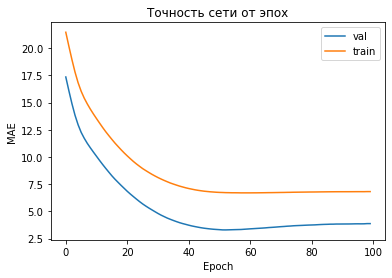

In [27]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 9:

- Число слоев = 5,  
- Число нейронов = 64
- Типы активации = relu, elu, sigmoid, tanh
- Тип оптимизатора = Adam

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_84 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_87 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 65  

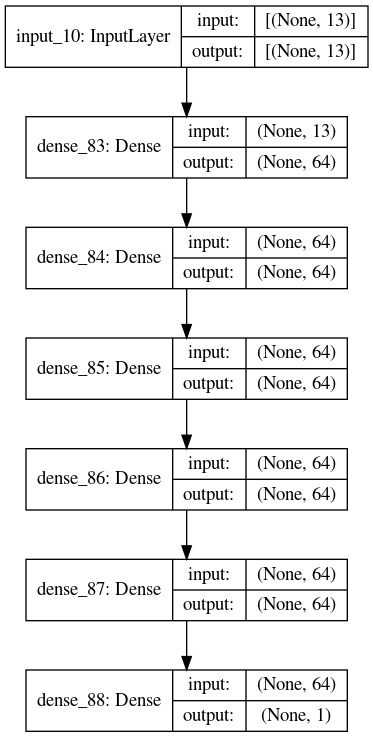

In [28]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input) #1
x = Dense(64, activation='elu')(x) #2
x = Dense(64, activation='tanh')(x) #3
x = Dense(64, activation='sigmoid')(x) #4
x = Dense(64, activation='elu')(x) #5
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 1s - loss: 467.6248 - MAE: 19.4833 - val_loss: 207.0820 - val_MAE: 13.6207
Epoch 2/100
10/10 - 0s - loss: 315.2309 - MAE: 15.1150 - val_loss: 104.5092 - val_MAE: 9.5166
Epoch 3/100
10/10 - 0s - loss: 199.4995 - MAE: 11.0211 - val_loss: 41.6933 - val_MAE: 5.9283
Epoch 4/100
10/10 - 0s - loss: 126.2633 - MAE: 8.0662 - val_loss: 21.6203 - val_MAE: 3.6026
Epoch 5/100
10/10 - 0s - loss: 90.8088 - MAE: 6.7127 - val_loss: 30.8124 - val_MAE: 3.7294
Epoch 6/100
10/10 - 0s - loss: 87.5526 - MAE: 6.9493 - val_loss: 42.2629 - val_MAE: 4.7020
Epoch 7/100
10/10 - 0s - loss: 87.7974 - MAE: 7.1071 - val_loss: 39.1181 - val_MAE: 4.4477
Epoch 8/100
10/10 - 0s - loss: 86.4722 - MAE: 6.9116 - val_loss: 33.0503 - val_MAE: 3.9400
Epoch 9/100
10/10 - 0s - loss: 85.3349 - MAE: 6.7352 - val_loss: 30.9159 - val_MAE: 3.7721
Epoch 10/100
10/10 - 0s - loss: 84.9449 - MAE: 6.6730 - val_loss: 30.0698 - val_MAE: 3.7052
Epoch 11/100
10/10 - 0s - loss: 84.6002 - MAE: 6.6961 - val_loss: 31.5384 - val

Epoch 91/100
10/10 - 0s - loss: 22.4146 - MAE: 3.3492 - val_loss: 16.5852 - val_MAE: 3.3083
Epoch 92/100
10/10 - 0s - loss: 21.3649 - MAE: 3.3201 - val_loss: 12.8602 - val_MAE: 2.5916
Epoch 93/100
10/10 - 0s - loss: 20.3160 - MAE: 3.1733 - val_loss: 16.5632 - val_MAE: 3.3166
Epoch 94/100
10/10 - 0s - loss: 17.7668 - MAE: 3.0392 - val_loss: 12.7300 - val_MAE: 2.7060
Epoch 95/100
10/10 - 0s - loss: 21.9787 - MAE: 3.4069 - val_loss: 15.2715 - val_MAE: 3.0803
Epoch 96/100
10/10 - 0s - loss: 27.2937 - MAE: 3.7052 - val_loss: 12.6104 - val_MAE: 2.8556
Epoch 97/100
10/10 - 0s - loss: 23.7057 - MAE: 3.4157 - val_loss: 12.6927 - val_MAE: 2.7729
Epoch 98/100
10/10 - 0s - loss: 23.1288 - MAE: 3.4226 - val_loss: 15.3738 - val_MAE: 2.9683
Epoch 99/100
10/10 - 0s - loss: 23.5590 - MAE: 3.4506 - val_loss: 14.8398 - val_MAE: 3.0901
Epoch 100/100
10/10 - 0s - loss: 24.0740 - MAE: 3.6315 - val_loss: 18.7058 - val_MAE: 3.3268


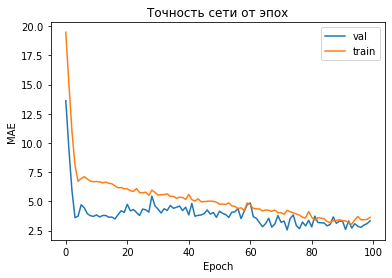

In [29]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Эксперемент 10:

- Число слоев = 5,  
- Число нейронов = 64, 128, 256, 512
- Типы активации = relu, elu, sigmoid, tanh
- Тип оптимизатора = Adam

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_89 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_90 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_91 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_92 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_93 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 65 

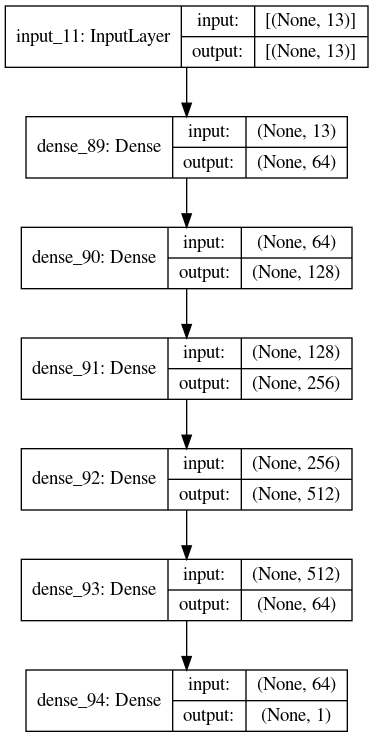

In [30]:
input = Input(shape=(13,))
x = Dense(64, activation='relu')(input) #1
x = Dense(128, activation='elu')(x) #2
x = Dense(256, activation='tanh')(x) #3
x = Dense(512, activation='sigmoid')(x) #4
x = Dense(64, activation='elu')(x) #5
output = Dense(1, activation='linear')(x)
model = Model(input, output)

model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

Epoch 1/100
10/10 - 0s - loss: 230.4130 - MAE: 11.7956 - val_loss: 57.4553 - val_MAE: 6.0520
Epoch 2/100
10/10 - 0s - loss: 98.2316 - MAE: 8.2920 - val_loss: 38.0717 - val_MAE: 4.4151
Epoch 3/100
10/10 - 0s - loss: 82.9814 - MAE: 6.4212 - val_loss: 22.5854 - val_MAE: 3.3309
Epoch 4/100
10/10 - 0s - loss: 75.7591 - MAE: 6.1699 - val_loss: 30.2621 - val_MAE: 4.0887
Epoch 5/100
10/10 - 0s - loss: 70.4114 - MAE: 6.1019 - val_loss: 25.1420 - val_MAE: 3.9984
Epoch 6/100
10/10 - 0s - loss: 67.1774 - MAE: 5.8229 - val_loss: 33.2660 - val_MAE: 4.8612
Epoch 7/100
10/10 - 0s - loss: 65.8573 - MAE: 5.8634 - val_loss: 27.9744 - val_MAE: 4.3813
Epoch 8/100
10/10 - 0s - loss: 64.7835 - MAE: 5.8307 - val_loss: 26.1168 - val_MAE: 4.2085
Epoch 9/100
10/10 - 0s - loss: 64.0645 - MAE: 5.6591 - val_loss: 25.2361 - val_MAE: 4.1162
Epoch 10/100
10/10 - 0s - loss: 62.4031 - MAE: 5.5747 - val_loss: 25.8230 - val_MAE: 4.1163
Epoch 11/100
10/10 - 0s - loss: 61.1546 - MAE: 5.5425 - val_loss: 24.5566 - val_MAE: 4.

10/10 - 0s - loss: 20.5281 - MAE: 3.3226 - val_loss: 41.3125 - val_MAE: 5.4176
Epoch 91/100
10/10 - 0s - loss: 19.8269 - MAE: 3.2521 - val_loss: 15.7190 - val_MAE: 3.1873
Epoch 92/100
10/10 - 0s - loss: 17.7838 - MAE: 3.0486 - val_loss: 14.2504 - val_MAE: 2.9732
Epoch 93/100
10/10 - 0s - loss: 16.5452 - MAE: 2.9321 - val_loss: 16.1698 - val_MAE: 3.0306
Epoch 94/100
10/10 - 0s - loss: 16.1271 - MAE: 2.8729 - val_loss: 22.9658 - val_MAE: 3.7254
Epoch 95/100
10/10 - 0s - loss: 19.1152 - MAE: 3.2223 - val_loss: 23.5483 - val_MAE: 3.9314
Epoch 96/100
10/10 - 0s - loss: 17.5939 - MAE: 3.0521 - val_loss: 20.6841 - val_MAE: 3.8328
Epoch 97/100
10/10 - 0s - loss: 15.8843 - MAE: 2.9188 - val_loss: 17.0521 - val_MAE: 3.0993
Epoch 98/100
10/10 - 0s - loss: 17.1177 - MAE: 3.0808 - val_loss: 17.3428 - val_MAE: 3.3893
Epoch 99/100
10/10 - 0s - loss: 18.2235 - MAE: 3.1705 - val_loss: 21.2859 - val_MAE: 3.7008
Epoch 100/100
10/10 - 0s - loss: 19.5271 - MAE: 3.2750 - val_loss: 29.3451 - val_MAE: 4.1717


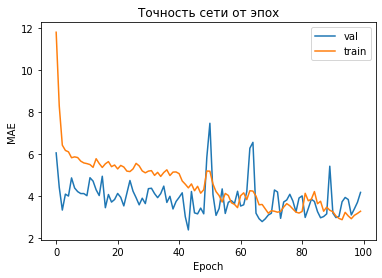

In [31]:
model.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MAE'])


history = model.fit(X, y,
                    epochs=100,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Точность сети от эпох')
plt.show()

### Вывод 

Точность модели зависит от архитектуры нейронной сети, использованной функции активации для создания нелинейности и вида оптимизатора. 

В нулевом эксперименте при однослойной нейронной сети достаточно быстро наступает переобучение т.к. ошибки на валидационной и тренировочной выборках совпадают. 

Различные варианты экспериментов с глубиной модели и различными настройками параметров дают достаточно широкий разбег результатов. 

Оптимальные результаты достигаются при глубине модели в 5 слове, использовании функции активации relu, числе нейронов не более 128 и оптимизаторе Adam.  